# Keras - Regression
<b>This notebook explains on how we can perform a regression task on Neural networks using Tensorflow keras library</b><br>
We have used a housing dataset that could be downloaded from the following [Link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)<br>
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It's a great dataset for evaluating simple regression models

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
# We can see if there are any null values in the dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So we see that there are no null values in the dataset

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 576x576 with 0 Axes>

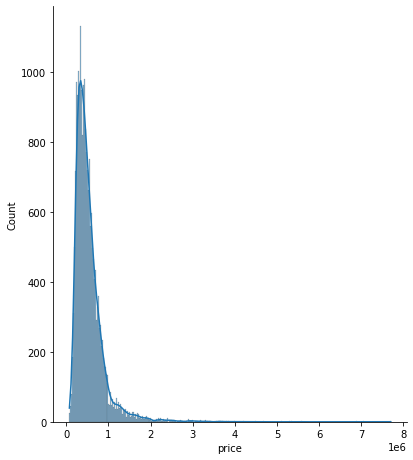

In [6]:
# Some visualization,s of the dataset - Average price of homes
plt.figure(figsize=(8,8))
sns.displot(df['price'], kde = True, height=6.5, aspect=.9)
plt.show()

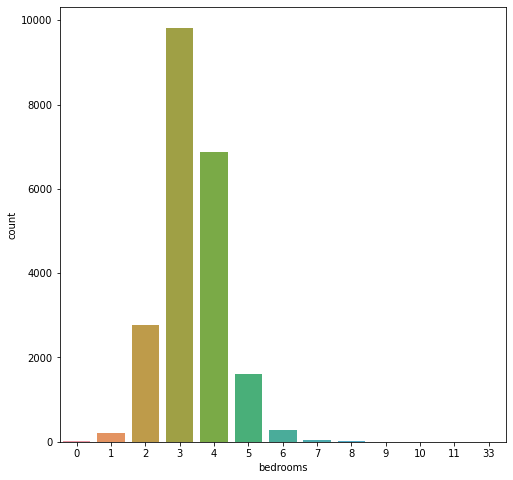

In [7]:
# The following plot shows how many bedrooms are present with the following bedrooms
plt.figure(figsize=(8,8))
sns.countplot(x = 'bedrooms', data = df)
plt.show()

In [8]:
# Finding the correlations
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
# Finding corelations of different features w.r.t. Price
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

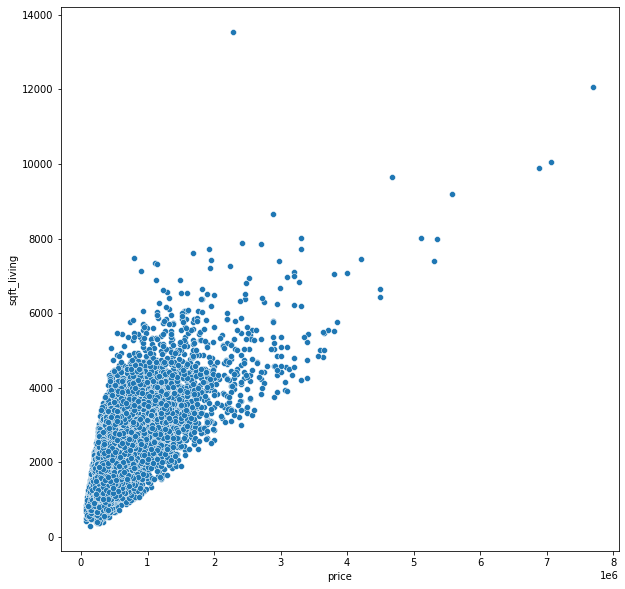

In [10]:
# Comparing 'sqft_living' and 'price'
plt.figure(figsize= (10,10))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)
plt.show()

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

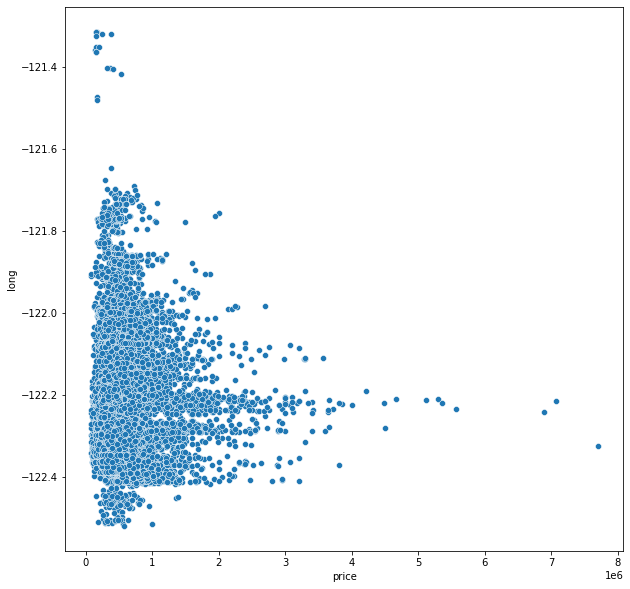

In [12]:
# Scatterplot of 'price' vs 'long'
plt.figure(figsize=(10,10))
sns.scatterplot(x='price', y = 'long', data = df)
plt.show()

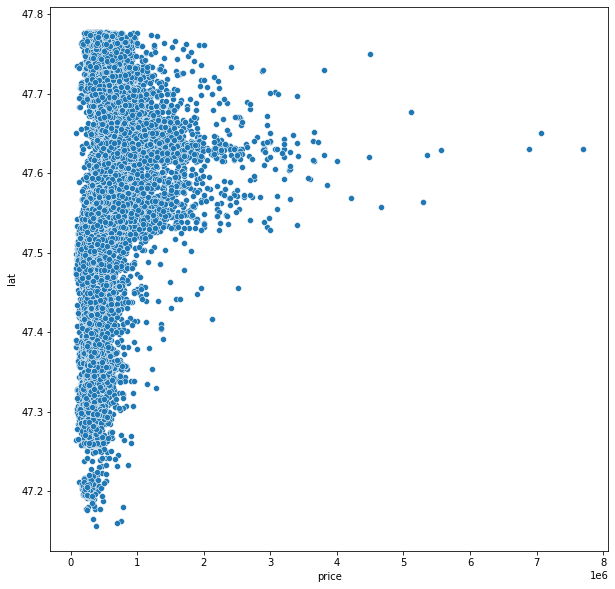

In [13]:
# Scatterplot of 'price' vs 'lat'
plt.figure(figsize=(10,10))
sns.scatterplot(x='price', y = 'lat', data = df)
plt.show()

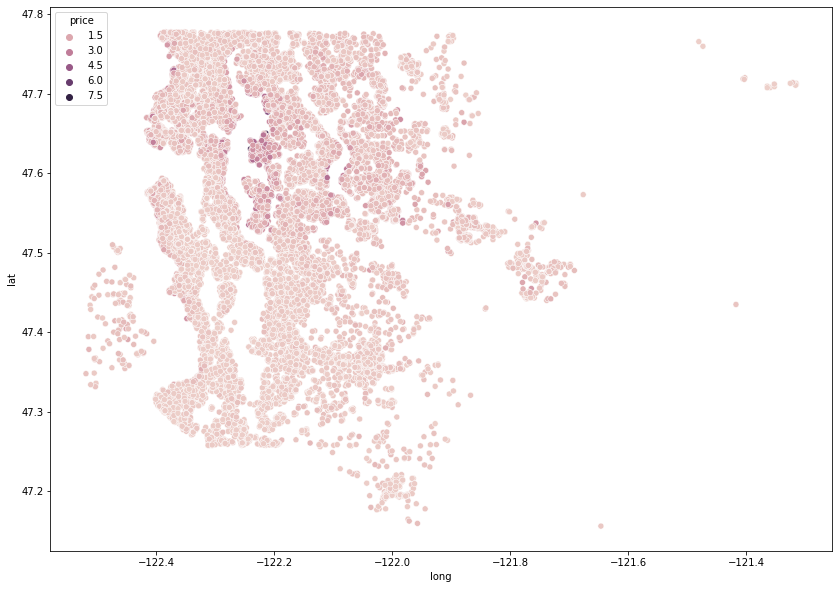

In [14]:
# Visualization of 'king county' - Seattle
plt.figure(figsize=(14,10))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')
plt.show()

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
# Finding the total number of houses in top 2 percent
pc_1 = round(len(df)*0.01)
pc_2= pc_1 * 2
pc_2

432

In [17]:
# Removing the top 2 percent houses w.r.to 'price'
df_non_top_1pc = df.sort_values('price').head(len(df)-pc_2)
df_non_top_1pc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11837,4139910160,20150401T000000,1600000.0,5,3.25,4320,32840,2.0,0,0,...,12,4320,0,1990,0,98006,47.5461,-122.122,4410,33210
2429,5026900160,20150424T000000,1600000.0,5,2.50,3100,5374,2.5,0,0,...,9,3100,0,1906,0,98122,47.6154,-122.283,2180,5800
1987,1118002090,20140628T000000,1600000.0,3,4.25,2820,7200,2.0,0,0,...,10,2460,360,1930,0,98112,47.6298,-122.290,3300,7522
7404,524059148,20140606T000000,1600000.0,4,3.50,4280,9583,2.0,0,0,...,11,4280,0,2005,0,98004,47.5979,-122.197,2360,10031


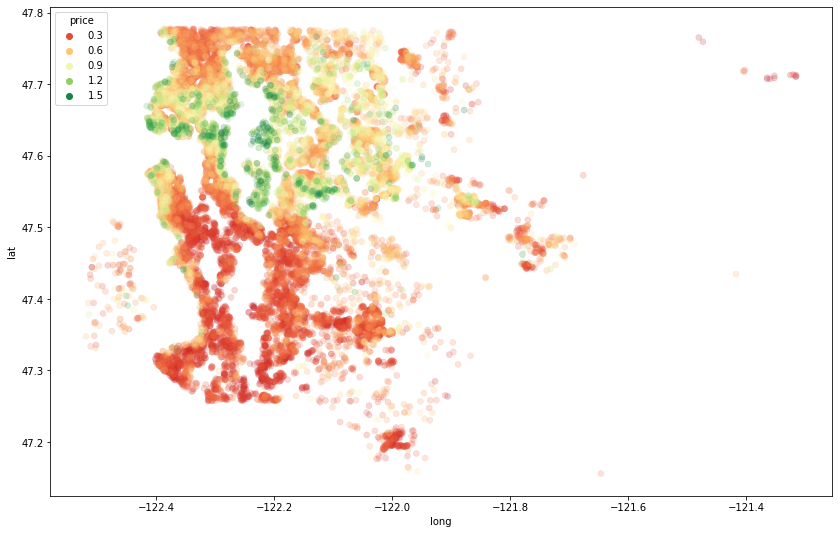

In [18]:
# Plotting house price values w.r.to their 'lat' and 'log'
plt.figure(figsize=(14,9))
sns.scatterplot(x = 'long', y = 'lat', data = df_non_top_1pc, hue = 'price', edgecolor = None, alpha = 0.2, palette='RdYlGn')
plt.show()

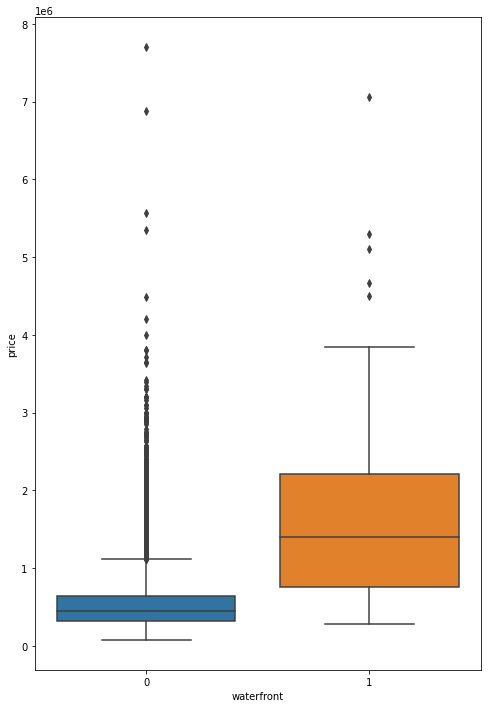

In [19]:
# Comparing houses values when they have a waterfront
plt.figure(figsize=(8,12))
sns.boxplot(x='waterfront', y='price', data = df)
plt.show()

Houses in front of a waterfront have higher prices

In [20]:
# Removing 'id' column from the df
df.drop('id', axis = 1, inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
# Converting dates to datetime values
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df['date'][0].year

2014

In [23]:
df['year'] = df['date'].apply(lambda x:x.year)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [24]:
df['month'] = df['date'].apply(lambda x:x.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [25]:
df.drop('date', inplace = True, axis = 1)
df.drop('zipcode', inplace = True, axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [26]:
len(df.columns)

20

### We will split our features from our labels for the entire original dataset

In [27]:
# We need to pass np.array values into pour labels and features for further processing otherwise it could lead to errors
print(type(df['price']))
print(type(df['price'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [28]:
X = df.drop('price', axis = 1).values # Features
y = df['price'].values # Labels

In [29]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
# We will performing the scaling on our dataset. This is done after train test split in order to avoid data leaking
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Importing NN libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
X_train.shape

(15129, 19)

In [34]:
# Defining the model
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

In [35]:
# Training the model
model.fit(x = X_train, y = y_train, batch_size=128, epochs = 400,
         validation_data=(X_test, y_test))

Epoch 1/400
119/119 [==============================] - 1s 6ms/step - loss: 423612776448.0000 - val_loss: 432922787840.0000
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 421510119424.0000 - val_loss: 425727983616.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 395599282176.0000 - val_loss: 367999582208.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 287016583168.0000 - val_loss: 207509110784.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 137163292672.0000 - val_loss: 108339568640.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 99494838272.0000 - val_loss: 103423860736.0000
Epoch 7/400
119/119 [==============================] - 1s 5ms/step - loss: 97381638144.0000 - val_loss: 101686534144.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 95803252736.0000 - val_loss: 100007501824.0000
Epoch 9/400
119/119

119/119 [==============================] - 1s 5ms/step - loss: 41304440832.0000 - val_loss: 41613426688.0000
Epoch 69/400
119/119 [==============================] - 1s 6ms/step - loss: 41225400320.0000 - val_loss: 41473683456.0000
Epoch 70/400
119/119 [==============================] - 1s 5ms/step - loss: 41122525184.0000 - val_loss: 41409175552.0000
Epoch 71/400
119/119 [==============================] - 1s 5ms/step - loss: 41026473984.0000 - val_loss: 41220595712.0000
Epoch 72/400
119/119 [==============================] - 1s 5ms/step - loss: 40914210816.0000 - val_loss: 41120194560.0000
Epoch 73/400
119/119 [==============================] - 1s 5ms/step - loss: 40852598784.0000 - val_loss: 41029320704.0000
Epoch 74/400
119/119 [==============================] - 1s 5ms/step - loss: 40736964608.0000 - val_loss: 40934092800.0000
Epoch 75/400
119/119 [==============================] - 1s 5ms/step - loss: 40635027456.0000 - val_loss: 40857346048.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 1s 5ms/step - loss: 34748788736.0000 - val_loss: 34388107264.0000
Epoch 136/400
119/119 [==============================] - 1s 6ms/step - loss: 34687123456.0000 - val_loss: 34324068352.0000
Epoch 137/400
119/119 [==============================] - 1s 6ms/step - loss: 34603483136.0000 - val_loss: 34344847360.0000
Epoch 138/400
119/119 [==============================] - 1s 6ms/step - loss: 34588745728.0000 - val_loss: 34299703296.0000
Epoch 139/400
119/119 [==============================] - 1s 6ms/step - loss: 34544713728.0000 - val_loss: 34185228288.0000
Epoch 140/400
119/119 [==============================] - 1s 5ms/step - loss: 34416775168.0000 - val_loss: 34062561280.0000
Epoch 141/400
119/119 [==============================] - 1s 6ms/step - loss: 34355197952.0000 - val_loss: 34014488576.0000
Epoch 142/400
119/119 [==============================] - 1s 5ms/step - loss: 34387877888.0000 - val_loss: 33983156224.0000
Epoch 143/400
11

119/119 [==============================] - 1s 7ms/step - loss: 32531908608.0000 - val_loss: 31928379392.0000
Epoch 202/400
119/119 [==============================] - 1s 6ms/step - loss: 32515618816.0000 - val_loss: 31945527296.0000
Epoch 203/400
119/119 [==============================] - 1s 7ms/step - loss: 32514146304.0000 - val_loss: 31881261056.0000
Epoch 204/400
119/119 [==============================] - 1s 7ms/step - loss: 32544786432.0000 - val_loss: 31863547904.0000
Epoch 205/400
119/119 [==============================] - 1s 5ms/step - loss: 32508743680.0000 - val_loss: 31874297856.0000
Epoch 206/400
119/119 [==============================] - 1s 5ms/step - loss: 32448442368.0000 - val_loss: 31874478080.0000
Epoch 207/400
119/119 [==============================] - 1s 5ms/step - loss: 32442124288.0000 - val_loss: 31795597312.0000
Epoch 208/400
119/119 [==============================] - 1s 5ms/step - loss: 32468477952.0000 - val_loss: 31767146496.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 31722424320.0000 - val_loss: 30961907712.0000
Epoch 268/400
119/119 [==============================] - 1s 6ms/step - loss: 31634278400.0000 - val_loss: 30947047424.0000
Epoch 269/400
119/119 [==============================] - 1s 6ms/step - loss: 31634567168.0000 - val_loss: 30933364736.0000
Epoch 270/400
119/119 [==============================] - 1s 6ms/step - loss: 31593596928.0000 - val_loss: 30925819904.0000
Epoch 271/400
119/119 [==============================] - 1s 6ms/step - loss: 31593867264.0000 - val_loss: 30900912128.0000
Epoch 272/400
119/119 [==============================] - 1s 6ms/step - loss: 31634960384.0000 - val_loss: 30961205248.0000
Epoch 273/400
119/119 [==============================] - 1s 6ms/step - loss: 31584876544.0000 - val_loss: 30909976576.0000
Epoch 274/400
119/119 [==============================] - 1s 6ms/step - loss: 31559731200.0000 - val_loss: 30989234176.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 31011461120.0000 - val_loss: 30359343104.0000
Epoch 334/400
119/119 [==============================] - 1s 6ms/step - loss: 30972827648.0000 - val_loss: 30440470528.0000
Epoch 335/400
119/119 [==============================] - 1s 5ms/step - loss: 31006484480.0000 - val_loss: 30338871296.0000
Epoch 336/400
119/119 [==============================] - 1s 6ms/step - loss: 31000971264.0000 - val_loss: 30320902144.0000
Epoch 337/400
119/119 [==============================] - 1s 6ms/step - loss: 30987085824.0000 - val_loss: 30325909504.0000
Epoch 338/400
119/119 [==============================] - 1s 5ms/step - loss: 31037478912.0000 - val_loss: 30323107840.0000
Epoch 339/400
119/119 [==============================] - 1s 5ms/step - loss: 30894665728.0000 - val_loss: 30520651776.0000
Epoch 340/400
119/119 [==============================] - 1s 5ms/step - loss: 30933604352.0000 - val_loss: 30368673792.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 5ms/step - loss: 30474418176.0000 - val_loss: 30011836416.0000
Epoch 400/400
119/119 [==============================] - 1s 5ms/step - loss: 30519345152.0000 - val_loss: 29987084288.0000


In [36]:
# History of losses
model.history.history

{'loss': [423612776448.0,
  421510119424.0,
  395599282176.0,
  287016583168.0,
  137163292672.0,
  99494838272.0,
  97381638144.0,
  95803252736.0,
  94093721600.0,
  92080119808.0,
  89943875584.0,
  87656767488.0,
  85234958336.0,
  82667986944.0,
  79968059392.0,
  77161193472.0,
  74199367680.0,
  71239401472.0,
  68204408832.0,
  65243869184.0,
  62502957056.0,
  60020559872.0,
  57858588672.0,
  56103845888.0,
  54685315072.0,
  53453328384.0,
  52457381888.0,
  51583950848.0,
  50828775424.0,
  50141945856.0,
  49564049408.0,
  48995557376.0,
  48498524160.0,
  48023539712.0,
  47567892480.0,
  47167844352.0,
  46790234112.0,
  46453805056.0,
  46059642880.0,
  45825572864.0,
  45530136576.0,
  45326893056.0,
  45005643776.0,
  44789116928.0,
  44602802176.0,
  44355227648.0,
  44171284480.0,
  43942739968.0,
  43781832704.0,
  43619741696.0,
  43437248512.0,
  43266859008.0,
  43151224832.0,
  43003559936.0,
  42810556416.0,
  42686251008.0,
  42564177920.0,
  42457698304.0,
 

In [37]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.236128e+11,4.329228e+11
1,4.215101e+11,4.257280e+11
2,3.955993e+11,3.679996e+11
3,2.870166e+11,2.075091e+11
4,1.371633e+11,1.083396e+11
...,...,...
395,3.053522e+10,2.999981e+10
396,3.050816e+10,3.005116e+10
397,3.053722e+10,3.000232e+10
398,3.047442e+10,3.001184e+10


<AxesSubplot:>

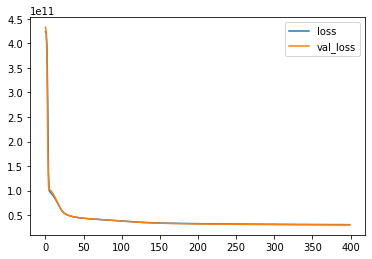

In [38]:
losses.plot()

### Evaluations

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [40]:
# Performing predictions on test dataset
predictions = model.predict(X_test)

In [41]:
# Mean squared error
mean_squared_error(y_test, predictions)

29987080011.397217

In [42]:
# Root mean sq error
np.sqrt(mean_squared_error(y_test, predictions))

173167.7799459161

In [43]:
# Mean abs error
mean_absolute_error(y_test, predictions)

107931.53432005706

In [44]:
# Describing the price values
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [45]:
# How much variance is explained by actual model - Higher the score, better is the model (Perfect - 1.0)
explained_variance_score(y_test, predictions)

0.7862652420517496

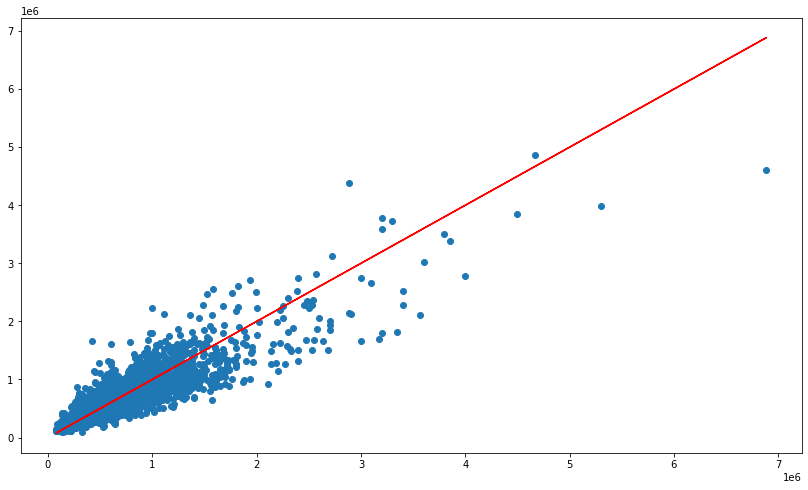

In [46]:
plt.figure(figsize=(14,8))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')
plt.show()

### Predictions
We will prepare the data that could be used by our trained model for predictions

In [50]:
single_house = df.drop('price',axis = 1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [51]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [52]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [53]:
scaler.transform(single_house.values.reshape(-1,19))

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.        , 0.81818182]])

In [54]:
# Transorm the values (Scaling)
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [55]:
# Prediction by trained model
model.predict(single_house)

array([[286955.3]], dtype=float32)

In [56]:
# Actual value
df['price'].iloc[0]

221900.0

### Now we will train our model on a dataset that does not include the top 2% priced house values in the dataset

Epoch 1/400
116/116 [==============================] - 1s 6ms/step - loss: 323362455552.0000 - val_loss: 316464103424.0000
Epoch 2/400
116/116 [==============================] - 1s 6ms/step - loss: 322507997184.0000 - val_loss: 313708511232.0000
Epoch 3/400
116/116 [==============================] - 1s 6ms/step - loss: 311774052352.0000 - val_loss: 289602863104.0000
Epoch 4/400
116/116 [==============================] - 1s 6ms/step - loss: 259271917568.0000 - val_loss: 203766284288.0000
Epoch 5/400
116/116 [==============================] - 1s 5ms/step - loss: 143661498368.0000 - val_loss: 80902062080.0000
Epoch 6/400
116/116 [==============================] - 1s 6ms/step - loss: 56803520512.0000 - val_loss: 44455178240.0000
Epoch 7/400
116/116 [==============================] - 1s 5ms/step - loss: 44090474496.0000 - val_loss: 43239440384.0000
Epoch 8/400
116/116 [==============================] - 1s 5ms/step - loss: 43302543360.0000 - val_loss: 42654294016.0000
Epoch 9/400
116/116 [==

116/116 [==============================] - 1s 6ms/step - loss: 19907891200.0000 - val_loss: 18937651200.0000
Epoch 69/400
116/116 [==============================] - 1s 5ms/step - loss: 19858544640.0000 - val_loss: 18938693632.0000
Epoch 70/400
116/116 [==============================] - 1s 5ms/step - loss: 19816333312.0000 - val_loss: 18857797632.0000
Epoch 71/400
116/116 [==============================] - 1s 5ms/step - loss: 19792799744.0000 - val_loss: 18823714816.0000
Epoch 72/400
116/116 [==============================] - 1s 5ms/step - loss: 19742187520.0000 - val_loss: 18785689600.0000
Epoch 73/400
116/116 [==============================] - 1s 5ms/step - loss: 19715084288.0000 - val_loss: 18750197760.0000
Epoch 74/400
116/116 [==============================] - 1s 5ms/step - loss: 19672930304.0000 - val_loss: 18745206784.0000
Epoch 75/400
116/116 [==============================] - 1s 5ms/step - loss: 19642572800.0000 - val_loss: 18816997376.0000
Epoch 76/400
116/116 [===============

Epoch 135/400
116/116 [==============================] - 1s 5ms/step - loss: 18304487424.0000 - val_loss: 17416634368.0000
Epoch 136/400
116/116 [==============================] - 1s 4ms/step - loss: 18277980160.0000 - val_loss: 17394591744.0000
Epoch 137/400
116/116 [==============================] - 1s 4ms/step - loss: 18279587840.0000 - val_loss: 17382696960.0000
Epoch 138/400
116/116 [==============================] - 1s 5ms/step - loss: 18271031296.0000 - val_loss: 17367037952.0000
Epoch 139/400
116/116 [==============================] - 1s 5ms/step - loss: 18258790400.0000 - val_loss: 17359552512.0000
Epoch 140/400
116/116 [==============================] - 1s 5ms/step - loss: 18246578176.0000 - val_loss: 17365639168.0000
Epoch 141/400
116/116 [==============================] - 1s 5ms/step - loss: 18249187328.0000 - val_loss: 17348372480.0000
Epoch 142/400
116/116 [==============================] - 1s 5ms/step - loss: 18224203776.0000 - val_loss: 17327689728.0000
Epoch 143/400
11

116/116 [==============================] - 1s 5ms/step - loss: 17830428672.0000 - val_loss: 17091718144.0000
Epoch 202/400
116/116 [==============================] - 1s 4ms/step - loss: 17850296320.0000 - val_loss: 17049917440.0000
Epoch 203/400
116/116 [==============================] - 0s 4ms/step - loss: 17835161600.0000 - val_loss: 17006843904.0000
Epoch 204/400
116/116 [==============================] - 1s 4ms/step - loss: 17839321088.0000 - val_loss: 17017225216.0000
Epoch 205/400
116/116 [==============================] - 1s 4ms/step - loss: 17832511488.0000 - val_loss: 17034217472.0000
Epoch 206/400
116/116 [==============================] - 1s 4ms/step - loss: 17817763840.0000 - val_loss: 17000949760.0000
Epoch 207/400
116/116 [==============================] - 1s 4ms/step - loss: 17813653504.0000 - val_loss: 17014562816.0000
Epoch 208/400
116/116 [==============================] - 1s 5ms/step - loss: 17820432384.0000 - val_loss: 17001937920.0000
Epoch 209/400
116/116 [=======

116/116 [==============================] - 1s 6ms/step - loss: 17666699264.0000 - val_loss: 16924165120.0000
Epoch 268/400
116/116 [==============================] - 1s 7ms/step - loss: 17680685056.0000 - val_loss: 16969837568.0000
Epoch 269/400
116/116 [==============================] - 1s 6ms/step - loss: 17679263744.0000 - val_loss: 16900327424.0000
Epoch 270/400
116/116 [==============================] - 1s 6ms/step - loss: 17663225856.0000 - val_loss: 16959418368.0000
Epoch 271/400
116/116 [==============================] - 1s 6ms/step - loss: 17669068800.0000 - val_loss: 16895616000.0000
Epoch 272/400
116/116 [==============================] - 1s 5ms/step - loss: 17666650112.0000 - val_loss: 16927059968.0000
Epoch 273/400
116/116 [==============================] - 1s 5ms/step - loss: 17653186560.0000 - val_loss: 16901594112.0000
Epoch 274/400
116/116 [==============================] - 1s 5ms/step - loss: 17662834688.0000 - val_loss: 16893533184.0000
Epoch 275/400
116/116 [=======

116/116 [==============================] - 1s 4ms/step - loss: 17534261248.0000 - val_loss: 16807830528.0000
Epoch 334/400
116/116 [==============================] - 1s 4ms/step - loss: 17532860416.0000 - val_loss: 16861864960.0000
Epoch 335/400
116/116 [==============================] - 1s 4ms/step - loss: 17538097152.0000 - val_loss: 16820466688.0000
Epoch 336/400
116/116 [==============================] - 0s 4ms/step - loss: 17528133632.0000 - val_loss: 16828246016.0000
Epoch 337/400
116/116 [==============================] - 0s 4ms/step - loss: 17526136832.0000 - val_loss: 16801444864.0000
Epoch 338/400
116/116 [==============================] - 0s 4ms/step - loss: 17524021248.0000 - val_loss: 16850223104.0000
Epoch 339/400
116/116 [==============================] - 1s 4ms/step - loss: 17525291008.0000 - val_loss: 16818756608.0000
Epoch 340/400
116/116 [==============================] - 1s 4ms/step - loss: 17535348736.0000 - val_loss: 16799775744.0000
Epoch 341/400
116/116 [=======

116/116 [==============================] - 1s 4ms/step - loss: 17310992384.0000 - val_loss: 16579054592.0000
Epoch 400/400
116/116 [==============================] - 1s 4ms/step - loss: 17303463936.0000 - val_loss: 16582703104.0000


<AxesSubplot:>

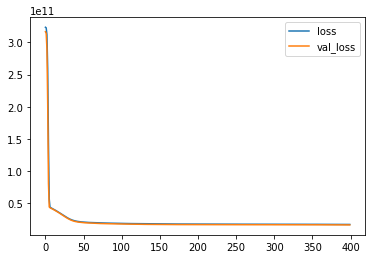

In [57]:
df_non_top_1pc['date'] = pd.to_datetime(df_non_top_1pc['date'])

df_non_top_1pc['month'] = df_non_top_1pc['date'].apply(lambda x:x.month)
df_non_top_1pc['year'] = df_non_top_1pc['date'].apply(lambda x:x.year)
df_non_top_1pc.drop('date', inplace = True, axis = 1)
df_non_top_1pc.drop('id', inplace = True, axis = 1)
df_non_top_1pc.drop('zipcode', inplace = True, axis = 1)
 
X = df_non_top_1pc.drop('price', axis = 1).values # Features
y = df_non_top_1pc['price'].values # Labels

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# We will performing the scaling on our dataset. This is done after train test split in order to avoid data leaking
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the model
model = Sequential()
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

# Training the model
model.fit(x = X_train, y = y_train, batch_size=128, epochs = 400,
         validation_data=(X_test, y_test))

losses = pd.DataFrame(model.history.history)

losses.plot()

### Evaluations

MSE:  16582702274.25123
RMSE:  128773.84157604071
MAE:  89793.57086324744

 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

 Explained variance only 0.7464684506253207


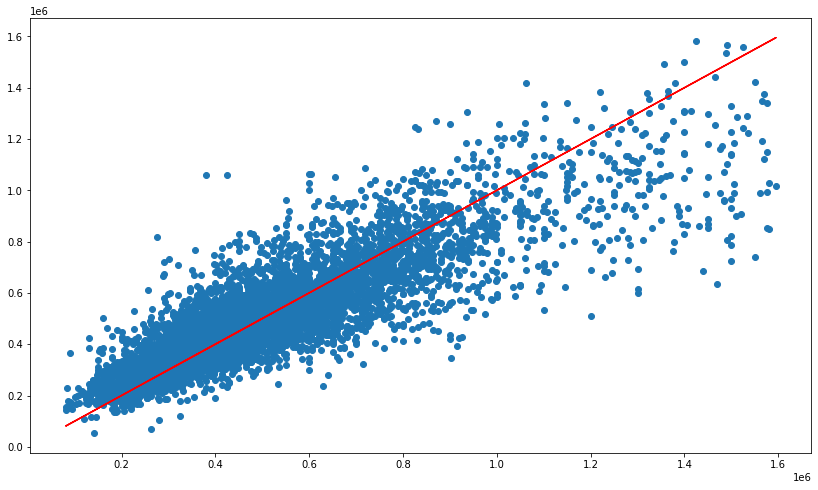

In [62]:
# Performing predictions on test dataset
predictions = model.predict(X_test)

# Mean squared error
print('MSE: ', mean_squared_error(y_test, predictions))

# Root mean sq error
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

# Mean abs error
print('MAE: ', mean_absolute_error(y_test, predictions))

# Describing the price values
print('\n', df['price'].describe())

# How much variance is explained by actual model - Higher the score, better is the model (Perfect - 1.0)
print('\n Explained variance only', explained_variance_score(y_test, predictions))

plt.figure(figsize=(14,8))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')
plt.show()

We see that when we take the bottom 98% values to train our house prediction model. It could be observed there is a higher variance in the predicted values and it could be observed that training on this dataset it leads to developing of a model that does not perform well in comparison to former 

In [59]:
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.        , 0.81818182]])

In [61]:
single_house = df_non_top_1pc.drop('price',axis = 1).iloc[0]

# Transorm the values (Scaling)
single_house = scaler.transform(single_house.values.reshape(-1,19))

# Prediction by trained model
print(model.predict(single_house))

# Actual value
df_non_top_1pc['price'].iloc[0]

[[64189.766]]


75000.0